In [1]:
# from tqdm import tqdm_notebook
from tqdm.notebook import tqdm 
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


findfont: Font family ['malgun'] not found. Falling back to DejaVu Sans.


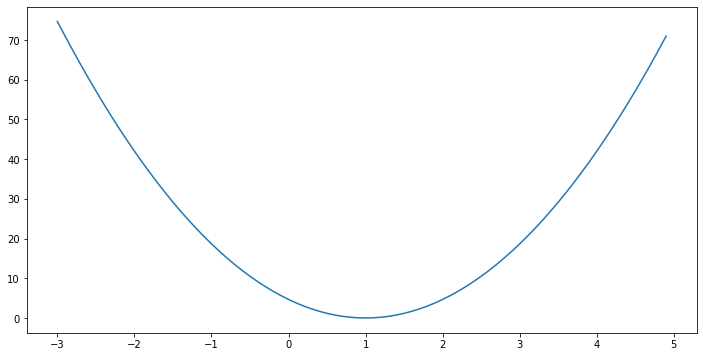

In [2]:
# import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

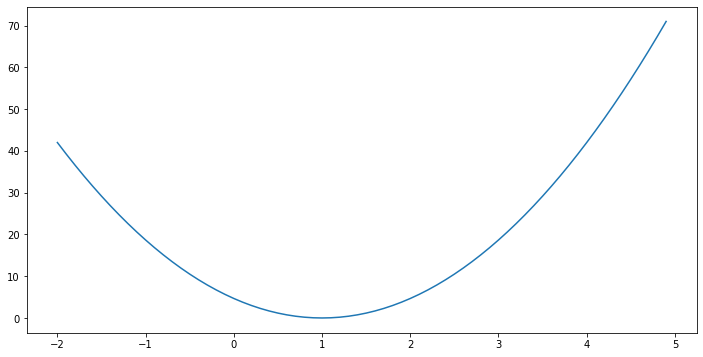

In [3]:
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-20, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

In [4]:
# import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))
# reduce_sum 잔차의 합

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))    
    print("step={step},   \t sess_cost={sess_cost},    \t W={sess_W}".format(
            step=step, 
            sess_cost=sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
            sess_W=sess.run(W)
            ));

step=0,   	 sess_cost=46.36005783081055,    	 W=[-0.8197342]
step=1,   	 sess_cost=13.186861038208008,    	 W=[0.02947509]
step=2,   	 sess_cost=3.750929355621338,    	 W=[0.4823867]
step=3,   	 sess_cost=1.0669310092926025,    	 W=[0.7239396]
step=4,   	 sess_cost=0.3034825026988983,    	 W=[0.8527678]
step=5,   	 sess_cost=0.0863238275051117,    	 W=[0.9214762]
step=6,   	 sess_cost=0.024554312229156494,    	 W=[0.95812064]
step=7,   	 sess_cost=0.006984352599829435,    	 W=[0.97766435]
step=8,   	 sess_cost=0.0019866558723151684,    	 W=[0.98808765]
step=9,   	 sess_cost=0.0005650901002809405,    	 W=[0.99364674]
step=10,   	 sess_cost=0.0001607380254426971,    	 W=[0.9966116]
step=11,   	 sess_cost=4.572059333440848e-05,    	 W=[0.99819285]
step=12,   	 sess_cost=1.3005626897211187e-05,    	 W=[0.9990362]
step=13,   	 sess_cost=3.6991823435528204e-06,    	 W=[0.99948597]
step=14,   	 sess_cost=1.0519003126319149e-06,    	 W=[0.9997259]
step=15,   	 sess_cost=2.9933619316580007e-07,

In [7]:
# import tensorflow as tf

# tf Graph Input
X = [1, 2, 3, 5]
Y = [1, 2, 3, 5]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

W_val = []
step_val = []

for step in range(101):
    W_val.append(sess.run(W))
    step_val.append(step)
    
    if step % 10 == 0 or step < 10:
        # print(step, sess.run(W))
        print("step={step}, \t W={W_val}".format(
            step=step, W_val=sess.run(W)
            )); 
                
    sess.run(train)

step=0, 	 W=5.0
step=1, 	 W=-2.8000001907348633
step=2, 	 W=4.609999656677246
step=3, 	 W=-2.4295010566711426
step=4, 	 W=4.258026599884033
step=5, 	 W=-2.095125198364258
step=6, 	 W=3.940369129180908
step=7, 	 W=-1.7933506965637207
step=8, 	 W=3.6536831855773926
step=9, 	 W=-1.5209989547729492
step=10, 	 W=3.394949436187744
step=20, 	 W=2.4339442253112793
step=30, 	 W=1.858555793762207
step=40, 	 W=1.5140492916107178
step=50, 	 W=1.3077805042266846
step=60, 	 W=1.1842795610427856
step=70, 	 W=1.110335111618042
step=80, 	 W=1.0660618543624878
step=90, 	 W=1.0395535230636597
step=100, 	 W=1.0236819982528687


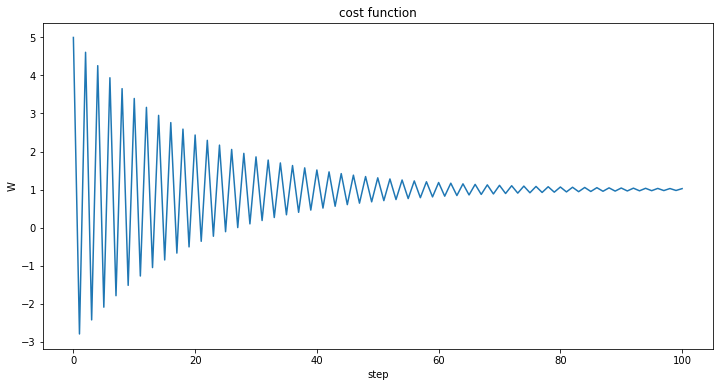

In [8]:
# Show the cost function
plt.plot(step_val, W_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('W')
plt.show()
#데이터가 많으면 속도는 느리나 신뢰도가 높다. 


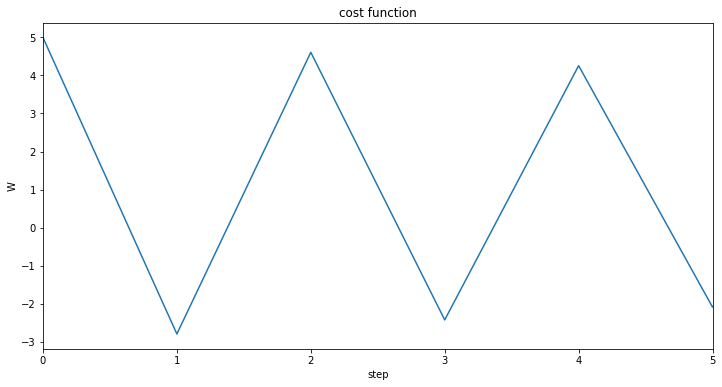

In [9]:
# Show the cost function
plt.plot(step_val, W_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('W')
plt.xlim(0, 5)
plt.show()

In [10]:
type(train)

tensorflow.python.framework.ops.Operation

In [11]:
# import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [2, 4, 6]

# Set wrong model weights
W = tf.Variable(-7.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# tensorboard for graph
writer = tf.summary.FileWriter("./graph/sect03", sess.graph)

In [12]:
sess.graph

http://localhost:9999

In [14]:
# !tensobord --loadir=graph/board--port=9999

'tensobord'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
